# 1) Setup

### 1.1) install TensorFlow

In [1]:
!pip install tensorflow  opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
 # avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### 1.2) Remove dodgy images

In [4]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\JoeKnows\AppData\Local\Temp\ipykernel_18152\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir ='data'

In [6]:
image_exts = ['jpeg','jpg','bmp','png']

In [7]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

### 1.3) load our data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 292 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
# Get another batch from the iterator
batch = data_iterator.next()

In [13]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [14]:
# Class 0= jack russel
# Class 1= schnauzer 

batch[1]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

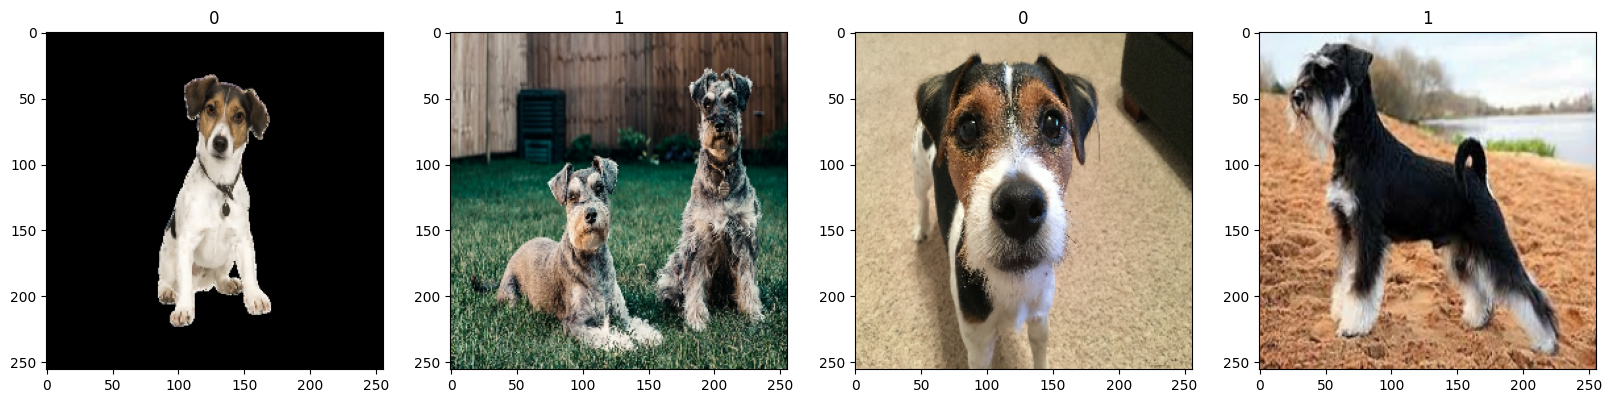

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2) Preprocessing the data

### 2.1) Scale Data

In [16]:
 data = data.map(lambda x, y: (x/255, y))

In [17]:
scaled_iterator = data.as_numpy_iterator()

In [18]:
batch = scaled_iterator.next()

In [19]:
batch[0].max()

1.0

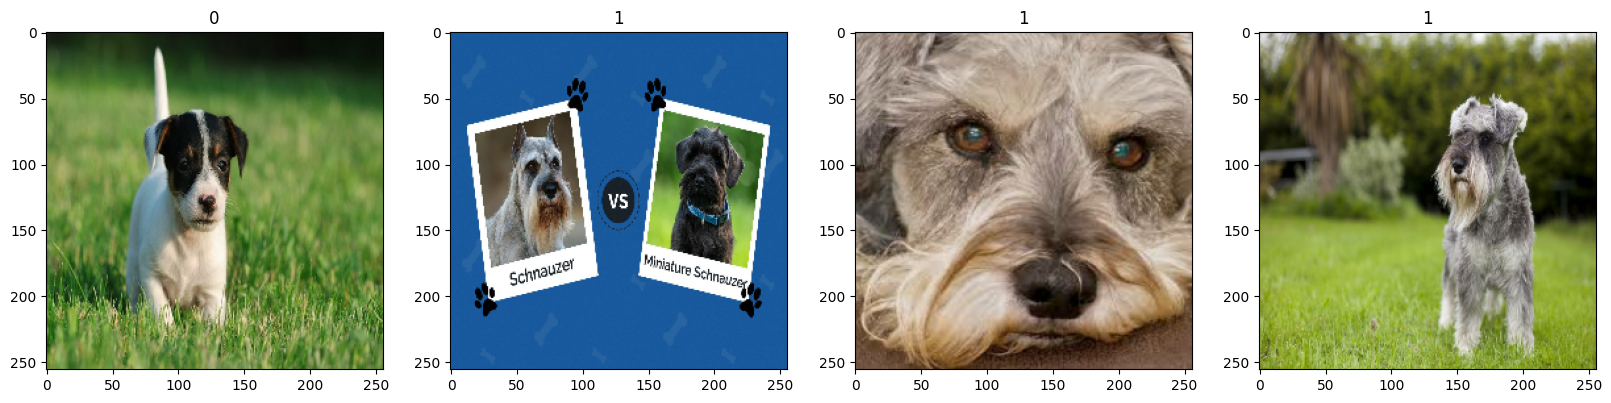

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2.2) Split Data

In [21]:
len(data)

10

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [23]:
train_size + val_size + test_size



10

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3) Deep Model

### 3.1) Build Deep Learning Model

In [25]:
 from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
          
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
          
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
          
model.add(Flatten())
          
model.add(Dense(256,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))


In [28]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### 3.2) Training

In [30]:
logdir = 'logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [32]:
hist = model.fit(train, epochs = 20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 6s 690ms/step - loss: 1.4681 - accuracy: 0.4821 - val_loss: 0.6994 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 5s 678ms/step - loss: 0.6963 - accuracy: 0.5089 - val_loss: 0.6811 - val_accuracy: 0.6562
Epoch 3/20
7/7 [==============================] - 5s 670ms/step - loss: 0.6917 - accuracy: 0.5536 - val_loss: 0.6956 - val_accuracy: 0.4531
Epoch 4/20
7/7 [==============================] - 5s 681ms/step - loss: 0.6738 - accuracy: 0.5759 - val_loss: 0.6210 - val_accuracy: 0.6562
Epoch 5/20
7/7 [==============================] - 5s 659ms/step - loss: 0.6729 - accuracy: 0.6473 - val_loss: 0.6767 - val_accuracy: 0.5781
Epoch 6/20
7/7 [==============================] - 5s 683ms/step - loss: 0.6508 - accuracy: 0.7098 - val_loss: 0.6056 - val_accuracy: 0.6719
Epoch 7/20
7/7 [==============================] - 5s 674ms/step - loss: 0.5911 - accuracy: 0.7143 - val_loss: 0.5342 - val_accuracy: 0.8125
Epoch 8/20
7/7 [====

### 3.3) Plot performance


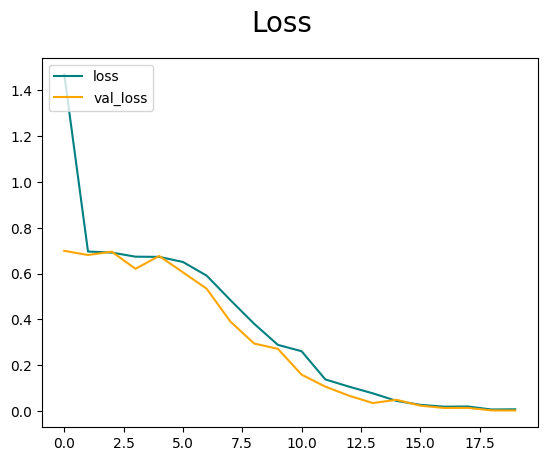

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')

fig.suptitle('Loss', fontsize = 20)
             
plt.legend(loc = "upper left")
plt.show()

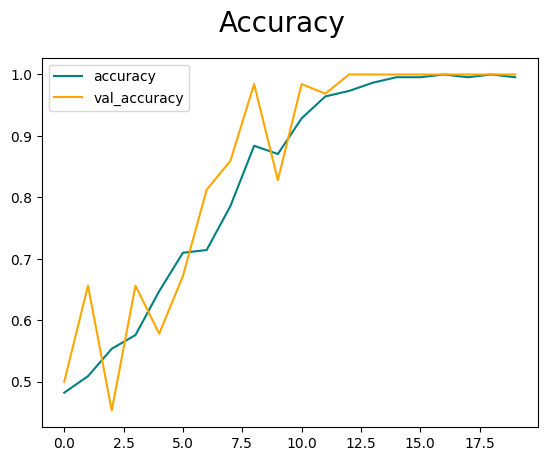

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')

fig.suptitle('Accuracy', fontsize = 20)
             
plt.legend(loc = "upper left")
plt.show()

# 4) Evaluate performance

### 4.1) Evaluate


In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
len(test)

1

In [38]:
for batch in test.as_numpy_iterator():
    X, Y = batch
    yhat = model.predict(X)
    pre.update_state(Y, yhat)
    re.update_state(Y, yhat)
    acc.update_state(Y, yhat)

1/1 [==============================] - 0s 114ms/step


In [39]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


### 4.2) Test

In [40]:
import cv2

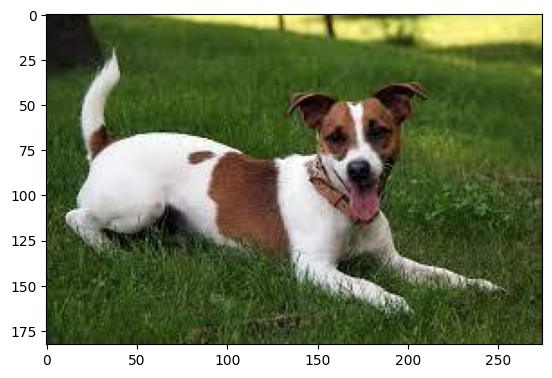

In [41]:
img = cv2.imread('jTest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

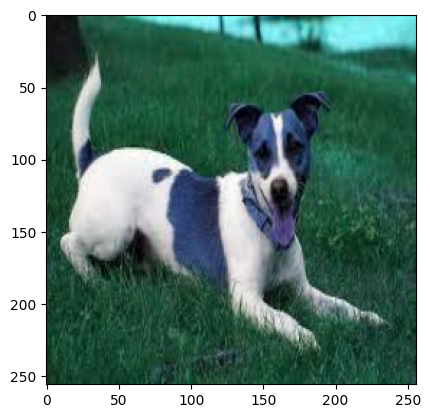

In [42]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 25ms/step


In [44]:
yhat


array([[0.24916379]], dtype=float32)

In [45]:
if yhat > 0.5:
    print(f'Predicted class is Schnauzer')
else:
    print(f'Predicted class is  Jack Rusell')

Predicted class is  Jack Rusell


# 5) Save the model

In [46]:
from tensorflow.keras.models import load_model

In [47]:
model.save(os.path.join('models','dogsModel.h5'))

C:\Users\JoeKnows\Documents\Machine Learning\ClassifyImages\imageclassification\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
# load model 
new_model = load_model(os.path.join('models','dogsModel.h5'))

In [49]:
# parse data
yhatNew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 74ms/step


In [50]:
yhatNew

array([[0.24916379]], dtype=float32)

In [51]:
if yhatNew > 0.5:
    print(f'Predicted class is Schnauzer')
else:
    print(f'Predicted class is  Jack Rusell')

Predicted class is  Jack Rusell
